In [2]:
import pandas as pd

C:\Users\diego\AppData\Local\Temp\ipykernel_16388\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data = pd.read_csv("ods_final.csv")

In [4]:
data.drop(["Country Code", "Indicator Code"], axis=1, inplace=True)
data.drop([str(year) for year in range(1990, 2005)], axis=1, inplace=True)

In [5]:
data.dtypes

Country Name       object
Indicator Name     object
2005              float64
2006              float64
2007              float64
2008              float64
2009              float64
2010              float64
2011              float64
2012              float64
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
2018              float64
2019              float64
2020              float64
dtype: object

In [6]:
data.head()

,Country Name,Indicator Name,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Arab World,Access to clean fuels and technologies for coo...,81.025768,81.965815,82.787189,83.475733,84.157423,84.683344,85.192742,85.644218,85.932567,86.232384,86.478597,86.722685,86.937933,87.040774,87.235539,87.307068
1,Arab World,Access to electricity (% of population),83.212982,85.459003,83.764440,83.386990,84.313484,87.114863,87.332661,87.039588,88.992620,88.015356,88.681886,89.195062,90.324659,88.910749,89.999946,90.277735
2,Arab World,Adolescent fertility rate (births per 1000 wom...,51.212964,50.839602,50.519536,50.305291,50.119204,49.966897,49.866968,49.791067,49.345359,48.853998,48.279738,47.504739,46.687119,46.002723,45.245369,44.406611
3,Arab World,Adolescents out of school (% of lower secondar...,22.989800,22.770361,22.480301,21.773720,20.483730,20.344179,20.335569,19.065210,21.608210,20.438419,19.498341,18.654560,18.455170,17.220699,16.369221,16.837469
4,Arab World,Employment in agriculture (% of total employme...,27.675792,26.839165,26.254170,25.405518,24.280701,23.116911,22.717904,21.844827,21.690171,21.464857,20.829068,20.315232,19.741404,18.602308,17.976566,NaN


In [7]:

melted_df = data.melt(id_vars=['Country Name', 'Indicator Name'], var_name='Year', value_name='Value')


pivot_df = melted_df.pivot_table(index=['Country Name', 'Year'], columns='Indicator Name', values='Value')


pivot_df.reset_index(inplace=True)

pivot_df


Indicator Name,Country Name,Year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adolescent fertility rate (births per 1000 women ages 15-19),Adolescents out of school (% of lower secondary school age),Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),Households and NPISHs Final consumption expenditure (annual % growth),People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),People using safely managed drinking water services (% of population),Primary completion rate total (% of relevant age group),Urban population (% of total population)
0,Afghanistan,2005,12.20,25.390894,138.4284,NaN,62.150002,11.33,26.530001,NaN,36.401501,27.475416,14.107275,NaN,22.703
1,Afghanistan,2006,13.85,30.718691,135.7602,NaN,61.279999,11.79,26.930000,NaN,38.475460,28.884040,14.909052,NaN,22.907
2,Afghanistan,2007,15.30,36.051010,133.0920,NaN,60.139999,12.20,27.660000,NaN,40.875746,30.374641,16.093878,NaN,23.113
3,Afghanistan,2008,16.70,42.400002,126.6330,NaN,59.290001,12.48,28.230000,NaN,43.311145,31.873854,17.322399,NaN,23.320
4,Afghanistan,2009,18.40,46.740051,120.1740,NaN,56.889999,13.63,29.480000,NaN,45.781609,33.381862,18.263765,NaN,23.528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4167,Zimbabwe,2016,29.80,42.561729,90.6766,2.261470,66.879997,7.05,26.070000,-10.501114,64.468964,37.529193,30.183683,99.265839,32.296
4168,Zimbabwe,2017,29.80,44.178635,86.1350,2.356790,66.480003,6.90,26.629999,1.396143,63.996625,36.941673,29.997683,95.476372,32.237
4169,Zimbabwe,2018,29.90,45.572647,83.2486,6.226070,66.019997,6.75,27.230000,-22.393220,63.538773,36.357160,29.827913,92.195152,32.209
4170,Zimbabwe,2019,30.10,46.781475,80.3622,7.544310,66.190002,6.57,27.240000,NaN,63.094957,35.774337,29.673569,88.508812,32.210


In [8]:
pivot_df.shape

(4172, 15)

In [9]:
numeric_columns = pivot_df.select_dtypes(include=['float64', 'int64']).columns
column_means = pivot_df[numeric_columns].mean()
df_clean =  pivot_df.copy()  # Copia del DataFrame original para no modificarlo directamente
df_clean[numeric_columns] = df_clean[numeric_columns].fillna(column_means)
print("Valores NaN:\n", df_clean.isna().sum())
df_clean

Valores NaN:
 Indicator Name
Country Name                                                                0
Year                                                                        0
Access to clean fuels and technologies for cooking (% of population)        0
Access to electricity (% of population)                                     0
Adolescent fertility rate (births per 1000 women ages 15-19)                0
Adolescents out of school (% of lower secondary school age)                 0
Employment in agriculture (% of total employment) (modeled ILO estimate)    0
Employment in industry (% of total employment) (modeled ILO estimate)       0
Employment in services (% of total employment) (modeled ILO estimate)       0
Households and NPISHs Final consumption expenditure (annual % growth)       0
People using at least basic drinking water services (% of population)       0
People using at least basic sanitation services (% of population)           0
People using safely managed drinkin

Indicator Name,Country Name,Year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adolescent fertility rate (births per 1000 women ages 15-19),Adolescents out of school (% of lower secondary school age),Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),Households and NPISHs Final consumption expenditure (annual % growth),People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),People using safely managed drinking water services (% of population),Primary completion rate total (% of relevant age group),Urban population (% of total population)
0,Afghanistan,2005,12.20,25.390894,138.4284,13.054666,62.150002,11.330000,26.530001,3.394257,36.401501,27.475416,14.107275,89.540284,22.703
1,Afghanistan,2006,13.85,30.718691,135.7602,13.054666,61.279999,11.790000,26.930000,3.394257,38.475460,28.884040,14.909052,89.540284,22.907
2,Afghanistan,2007,15.30,36.051010,133.0920,13.054666,60.139999,12.200000,27.660000,3.394257,40.875746,30.374641,16.093878,89.540284,23.113
3,Afghanistan,2008,16.70,42.400002,126.6330,13.054666,59.290001,12.480000,28.230000,3.394257,43.311145,31.873854,17.322399,89.540284,23.320
4,Afghanistan,2009,18.40,46.740051,120.1740,13.054666,56.889999,13.630000,29.480000,3.394257,45.781609,33.381862,18.263765,89.540284,23.528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4167,Zimbabwe,2016,29.80,42.561729,90.6766,2.261470,66.879997,7.050000,26.070000,-10.501114,64.468964,37.529193,30.183683,99.265839,32.296
4168,Zimbabwe,2017,29.80,44.178635,86.1350,2.356790,66.480003,6.900000,26.629999,1.396143,63.996625,36.941673,29.997683,95.476372,32.237
4169,Zimbabwe,2018,29.90,45.572647,83.2486,6.226070,66.019997,6.750000,27.230000,-22.393220,63.538773,36.357160,29.827913,92.195152,32.209
4170,Zimbabwe,2019,30.10,46.781475,80.3622,7.544310,66.190002,6.570000,27.240000,3.394257,63.094957,35.774337,29.673569,88.508812,32.210


# Correlación entre variables


In [10]:
correlation_matrix = df_clean.iloc[:,2:].corr(method='pearson')
correlation_matrix

Indicator Name,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adolescent fertility rate (births per 1000 women ages 15-19),Adolescents out of school (% of lower secondary school age),Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),Households and NPISHs Final consumption expenditure (annual % growth),People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),People using safely managed drinking water services (% of population),Primary completion rate total (% of relevant age group),Urban population (% of total population)
Indicator Name,,,,,,,,,,,,,
Access to clean fuels and technologies for cooking (% of population),1.000000,0.845619,-0.661906,-0.566737,-0.804517,0.632830,0.729555,-0.092070,0.812572,0.860287,0.624798,0.588332,0.645999
Access to electricity (% of population),0.845619,1.000000,-0.745200,-0.557005,-0.784114,0.665685,0.689886,-0.074482,0.901533,0.898930,0.551184,0.660928,0.604431
Adolescent fertility rate (births per 1000 women ages 15-19),-0.661906,-0.745200,1.000000,0.524399,0.674127,-0.600391,-0.580966,0.064175,-0.739236,-0.767920,-0.519573,-0.591678,-0.436696
Adolescents out of school (% of lower secondary school age),-0.566737,-0.557005,0.524399,1.000000,0.555352,-0.403795,-0.517904,0.053155,-0.560785,-0.579573,-0.353148,-0.665549,-0.393980
Employment in agriculture (% of total employment) (modeled ILO estimate),-0.804517,-0.784114,0.674127,0.555352,1.000000,-0.688181,-0.949420,0.102165,-0.791881,-0.791997,-0.618653,-0.553271,-0.689343
Employment in industry (% of total employment) (modeled ILO estimate),0.632830,0.665685,-0.600391,-0.403795,-0.688181,1.000000,0.425547,-0.040394,0.638572,0.635846,0.430531,0.462353,0.382924
Employment in services (% of total employment) (modeled ILO estimate),0.729555,0.689886,-0.580966,-0.517904,-0.949420,0.425547,1.000000,-0.109946,0.711315,0.712637,0.585292,0.489973,0.694060
Households and NPISHs Final consumption expenditure (annual % growth),-0.092070,-0.074482,0.064175,0.053155,0.102165,-0.040394,-0.109946,1.000000,-0.099922,-0.100899,-0.082708,-0.051680,-0.088116
People using at least basic drinking water services (% of population),0.812572,0.901533,-0.739236,-0.560785,-0.791881,0.638572,0.711315,-0.099922,1.000000,0.895936,0.612173,0.636493,0.625857


# Caja y bigotes

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

Gráfico de caja y bigotes variable 
"Access to clean fuels and technologies for cooking (% of population)"
Mediana: 67.72
Q1: 32.60
Q3: 99.40
El 50% de los datos se encuentra entre 32.60 y 99.40. La mediana es 67.72.



Gráfico de caja y bigotes variable 
"Access to electricity (% of population)"
Mediana: 98.48
Q1: 70.25
Q3: 100.00
El 50% de los datos se encuentra entre 70.25 y 100.00. La mediana es 98.48.



Gráfico de caja y bigotes variable 
"Adolescent fertility rate (births per 1000 women ages 15-19)"
Mediana: 47.97
Q1: 20.00
Q3: 71.25
El 50% de los datos se encuentra entre 20.00 y 71.25. La mediana es 47.97.



Gráfico de caja y bigotes variable 
"Adolescents out of school (% of lower secondary school age)"
Mediana: 13.05
Q1: 5.99
Q3: 13.05
El 50% de los datos se encuentra entre 5.99 y 13.05. La mediana es 13.05.



Gráfico de caja y bigotes variable 
"Employment in agriculture (% of total employment) (modeled ILO estimate)"
Mediana: 27.34
Q1: 9.90
Q3: 38.10
El 50% de los datos s

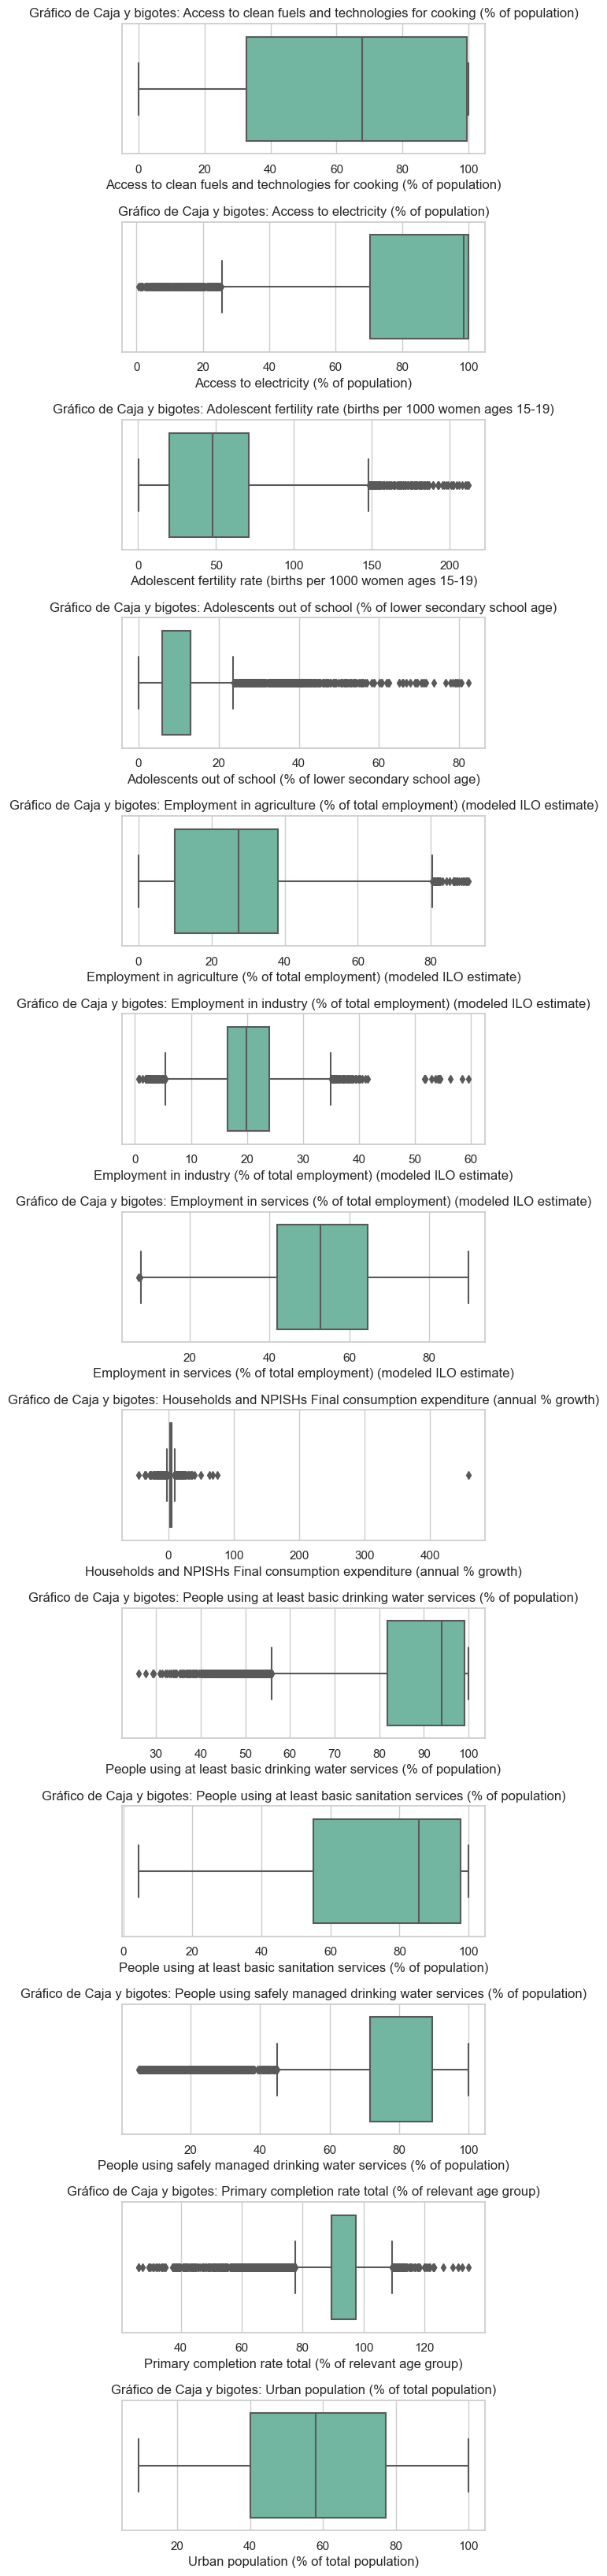

In [168]:
# Seleccionar solo las columnas numéricas
columnas_numericas = df_clean.select_dtypes(include=['float64'])

# Configurar el estilo y los ajustes de los gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(5, 50))

# Iterar sobre las columnas numéricas y crear gráficos de caja y bigotes
for i, columna in enumerate(columnas_numericas.columns):
    plt.subplot(20, 1, i + 1)
    sns.boxplot(x=columna, data=df_clean, palette="Set2")
    plt.title(f'Gráfico de Caja y bigotes: {columna}')

     # Obtener los puntos importantes: mediana y cuartiles
    median = df_clean[columna].median()
    quartiles = df_clean[columna].quantile([0.25, 0.75])
    quartile_1 = quartiles[0.25]
    quartile_3 = quartiles[0.75]
    
    print(f"Gráfico de caja y bigotes variable \n\"{columna}\"")
    # Mostrar etiquetas para la mediana y los cuartiles
    print(f'Mediana: {median:.2f}')
    print(f'Q1: {quartile_1:.2f}')
    print(f'Q3: {quartile_3:.2f}')
    print(f"El 50% de los datos se encuentra entre {quartile_1:.2f} y {quartile_3:.2f}. La mediana es {median:.2f}.")
    print("\n\n")

plt.tight_layout()
plt.show()

# Clustering

In [81]:
from sklearn.cluster import KMeans

In [82]:
X = df_clean.iloc[:,2:]
X

Indicator Name,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adolescent fertility rate (births per 1000 women ages 15-19),Adolescents out of school (% of lower secondary school age),Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),Households and NPISHs Final consumption expenditure (annual % growth),People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),People using safely managed drinking water services (% of population),Primary completion rate total (% of relevant age group),Urban population (% of total population)
0,12.20,25.390894,138.4284,13.054666,62.150002,11.330000,26.530001,3.394257,36.401501,27.475416,14.107275,89.540284,22.703
1,13.85,30.718691,135.7602,13.054666,61.279999,11.790000,26.930000,3.394257,38.475460,28.884040,14.909052,89.540284,22.907
2,15.30,36.051010,133.0920,13.054666,60.139999,12.200000,27.660000,3.394257,40.875746,30.374641,16.093878,89.540284,23.113
3,16.70,42.400002,126.6330,13.054666,59.290001,12.480000,28.230000,3.394257,43.311145,31.873854,17.322399,89.540284,23.320
4,18.40,46.740051,120.1740,13.054666,56.889999,13.630000,29.480000,3.394257,45.781609,33.381862,18.263765,89.540284,23.528
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4167,29.80,42.561729,90.6766,2.261470,66.879997,7.050000,26.070000,-10.501114,64.468964,37.529193,30.183683,99.265839,32.296
4168,29.80,44.178635,86.1350,2.356790,66.480003,6.900000,26.629999,1.396143,63.996625,36.941673,29.997683,95.476372,32.237
4169,29.90,45.572647,83.2486,6.226070,66.019997,6.750000,27.230000,-22.393220,63.538773,36.357160,29.827913,92.195152,32.209
4170,30.10,46.781475,80.3622,7.544310,66.190002,6.570000,27.240000,3.394257,63.094957,35.774337,29.673569,88.508812,32.210


In [133]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [116]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [139]:
clusters = kmeans.fit_predict(X)
data_with_clusters = df_clean.copy()
data_with_clusters["Cluster"] = clusters
result = data_with_clusters.filter(["Country Name", "Cluster", "Year"]).copy()
result.drop_duplicates().query("Cluster == 2")

,Country Name,Cluster,Year
16,Albania,2,2005
17,Albania,2,2006
18,Albania,2,2007
19,Albania,2,2008
20,Albania,2,2009
21,Albania,2,2010
22,Albania,2,2011
23,Albania,2,2012
24,Albania,2,2013
25,Albania,2,2014


# Clustering sector económico

In [151]:
X = df_clean.filter(["Employment in agriculture (% of total employment) (modeled ILO estimate)", "Employment in services (% of total employment) (modeled ILO estimate)", "Employment in industry (% of total employment) (modeled ILO estimate)"])

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

clusters = kmeans.fit_predict(X)
data_with_clusters = df_clean.copy()
data_with_clusters["Cluster"] = clusters
result = data_with_clusters.filter(["Country Name", "Cluster", "yE"]).copy()
result.drop_duplicates().query("Cluster == 2")

,Country Name,Cluster
12,Afghanistan,2
19,Albania,2
32,Algeria,2
48,American Samoa,2
64,Andorra,2
80,Angola,2
96,Antigua and Barbuda,2
112,Arab World,2
143,Argentina,2
144,Armenia,2


In [152]:
data_with_clusters.groupby(['Country Name', 'Cluster'])['Year'].agg(list).reset_index()

,Country Name,Cluster,Year
0,Afghanistan,1,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201..."
1,Afghanistan,2,"[2017, 2018, 2019, 2020]"
2,Albania,1,"[2005, 2006, 2007, 2011, 2012]"
3,Albania,2,"[2008, 2009, 2010, 2013, 2014, 2015, 2016, 201..."
4,Algeria,0,"[2007, 2008, 2009, 2010, 2011, 2012, 2013, 201..."
5,Algeria,2,"[2005, 2006, 2020]"
6,American Samoa,2,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201..."
7,Andorra,2,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201..."
8,Angola,1,"[2010, 2011, 2012, 2013, 2014, 2015, 2016, 201..."
9,Angola,2,"[2005, 2006, 2007, 2008, 2009, 2020]"


In [161]:
data_with_clusters.query("Year == '2006'")

Indicator Name,Country Name,Year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adolescent fertility rate (births per 1000 women ages 15-19),Adolescents out of school (% of lower secondary school age),Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),Households and NPISHs Final consumption expenditure (annual % growth),People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),People using safely managed drinking water services (% of population),Primary completion rate total (% of relevant age group),Urban population (% of total population),Cluster
1,Afghanistan,2006,13.850000,30.718691,135.760200,13.054666,61.279999,11.790000,26.930000,3.394257,38.475460,28.884040,14.909052,89.540284,22.907000,1
17,Albania,2006,54.800000,100.000000,18.534000,13.054666,46.299999,16.480000,37.220001,6.924264,89.519132,92.921406,54.467081,89.540284,47.815000,1
33,Algeria,2006,98.700000,98.869011,9.685600,13.054666,17.059999,27.520000,55.419998,3.210036,91.370956,86.059132,73.244347,83.628906,64.593000,2
49,American Samoa,2006,63.887851,81.837119,51.572037,13.054666,27.344438,19.946663,52.710318,-1.727447,98.923095,64.846929,85.079148,89.540284,88.000000,2
65,Andorra,2006,100.000000,100.000000,51.572037,13.054666,27.344438,19.946663,52.710318,3.394257,100.000001,100.000001,90.640001,89.540284,89.807000,2
81,Angola,2006,42.900000,30.586895,183.549600,13.054666,40.209999,8.580000,51.209999,6.410000,47.150229,35.991281,71.640117,89.540284,56.764000,2
97,Antigua and Barbuda,2006,100.000000,100.000000,52.868400,13.054666,27.344438,19.946663,52.710318,3.394257,97.554729,84.760835,71.640117,89.540284,28.606000,2
113,Arab World,2006,81.965815,85.459003,50.839602,22.770361,26.839165,22.337818,50.822247,7.592173,81.795105,76.214091,71.640117,80.904846,54.865736,2
129,Argentina,2006,98.100000,97.076057,63.162000,3.085590,1.050000,23.670000,75.279999,10.956234,97.633480,90.392080,71.640117,97.102478,90.200000,0
145,Armenia,2006,92.900000,99.188232,28.706600,6.210070,37.459999,18.490000,44.049999,8.291930,96.972629,89.293635,80.649767,93.811211,63.839000,2


# clustering factores educativos


In [166]:
X = df_clean.filter(["Adolescents out of school (% of lower secondary school age",
                     "Primary completion rate total (% of relevant age group)"])

kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)

clusters = kmeans.fit_predict(X)
data_with_clusters = df_clean.copy()
data_with_clusters["Cluster"] = clusters
data_with_clusters.groupby(['Country Name', 'Cluster'])['Year'].agg(list).reset_index()

,Country Name,Cluster,Year
0,Afghanistan,2,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201..."
1,Albania,0,"[2007, 2012, 2014, 2015, 2016, 2017, 2018, 2020]"
2,Albania,2,"[2005, 2006, 2008, 2009, 2010, 2011, 2013]"
3,Albania,4,[2019]
4,Algeria,0,"[2007, 2010, 2011, 2012, 2019]"
5,Algeria,2,"[2005, 2006, 2009]"
6,Algeria,4,"[2008, 2013, 2014, 2015, 2016, 2017, 2018, 2020]"
7,American Samoa,2,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201..."
8,Andorra,2,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201..."
9,Angola,2,"[2005, 2006, 2007, 2012, 2013, 2014, 2015, 201..."
